<a href="https://colab.research.google.com/github/thanapat2304/Work/blob/main/tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Work')
!pwd

/content/gdrive/MyDrive/Work


In [ ]:
!ls

tips.csv


In [ ]:
import pandas as pd

In [ ]:
tips_project = pd.read_csv('tips.csv')
print(tips_project.shape)
tips_project

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips_project.isnull().any()

,0
total_bill,False
tip,False
sex,False
smoker,False
day,False
time,False
size,False


In [ ]:
tips_project.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [ ]:
unique_times = tips_project['time'].unique()
print(unique_times)

['Dinner' 'Lunch']


In [ ]:
unique_sex = tips_project['sex'].unique()
print(unique_sex)

['Female' 'Male']


In [ ]:
unique_day = tips_project['day'].unique()
print(unique_day)

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur' < 'Fri' < 'Sat' < 'Sun']


In [ ]:
from matplotlib import pyplot as plt

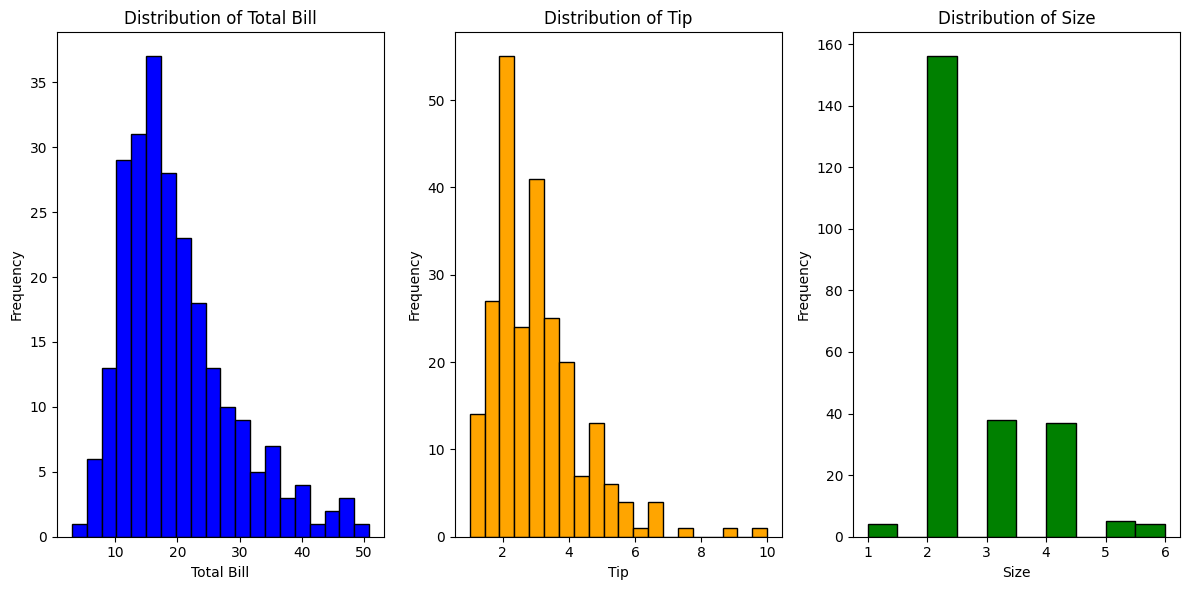

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(tips_project['total_bill'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

# สร้างกราฟ Histogram สำหรับ tip
plt.subplot(1, 3, 2)
plt.hist(tips_project['tip'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Tip')
plt.xlabel('Tip')
plt.ylabel('Frequency')

# สร้างกราฟ Histogram สำหรับ size
plt.subplot(1, 3, 3)
plt.hist(tips_project['size'], bins=10, color='green', edgecolor='black')
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

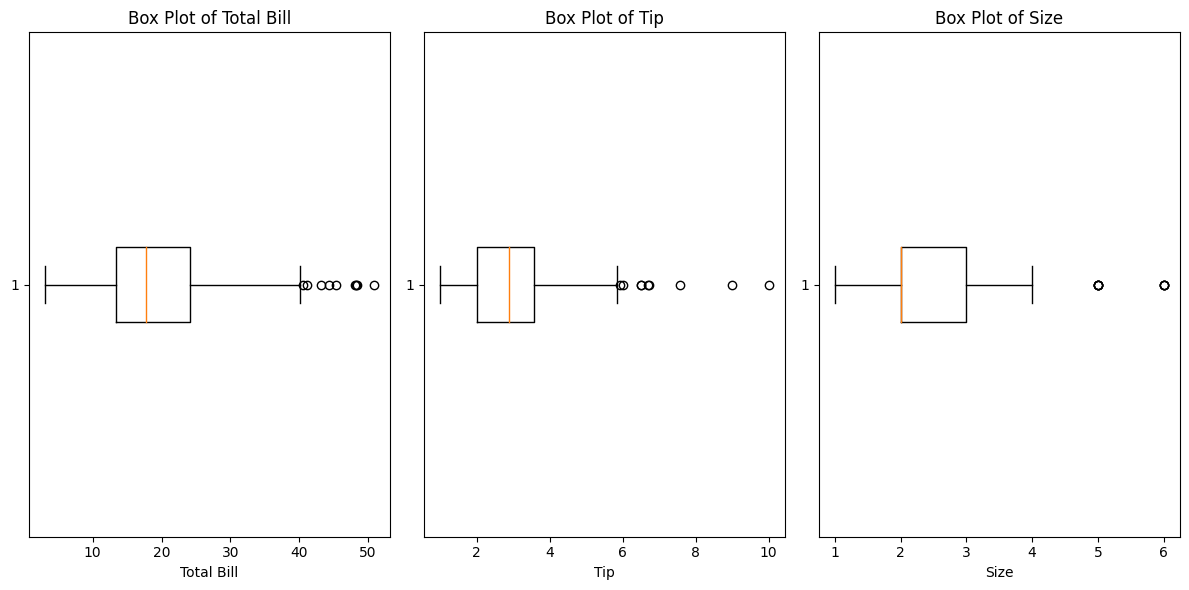

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(tips_project['total_bill'], vert=False)
plt.title('Box Plot of Total Bill')
plt.xlabel('Total Bill')

plt.subplot(1, 3, 2)
plt.boxplot(tips_project['tip'], vert=False)
plt.title('Box Plot of Tip')
plt.xlabel('Tip')

plt.subplot(1, 3, 3)
plt.boxplot(tips_project['size'], vert=False)
plt.title('Box Plot of Size')
plt.xlabel('Size')

plt.tight_layout()
plt.show()

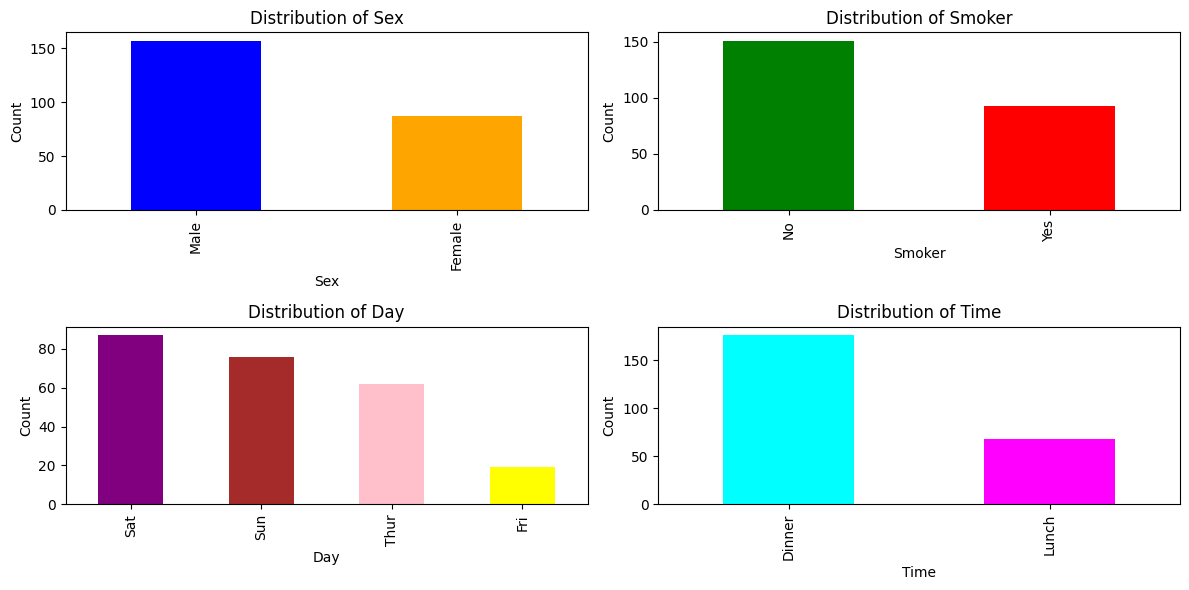

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
tips_project['sex'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# สร้างกราฟแท่งสำหรับ smoker
plt.subplot(2, 2, 2)
tips_project['smoker'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')

# สร้างกราฟแท่งสำหรับ day
plt.subplot(2, 2, 3)
tips_project['day'].value_counts().plot(kind='bar', color=['purple', 'brown', 'pink', 'yellow'])
plt.title('Distribution of Day')
plt.xlabel('Day')
plt.ylabel('Count')

# สร้างกราฟแท่งสำหรับ time
plt.subplot(2, 2, 4)
tips_project['time'].value_counts().plot(kind='bar', color=['cyan', 'magenta'])
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

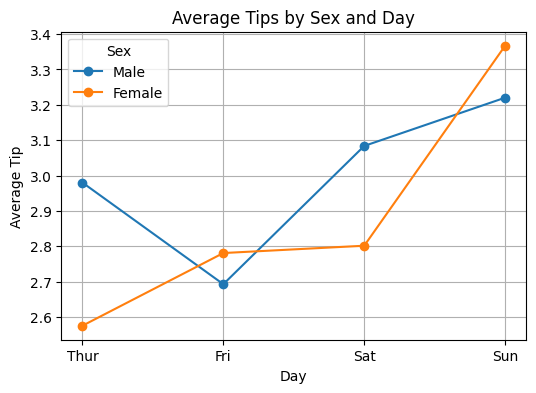

In [ ]:
day_order = ['Thur', 'Fri', 'Sat', 'Sun']
tips_project['day'] = pd.Categorical(tips_project['day'], categories=day_order, ordered=True)

# คำนวณค่าเฉลี่ยของทิปตามเพศและวัน
avg_tips_by_sex_day = tips_project.groupby(['sex', 'day'], observed=False)['tip'].mean().unstack()

# สร้างกราฟเส้น
plt.figure(figsize=(6, 4))

# Plot data for each sex
plt.plot(avg_tips_by_sex_day.columns, avg_tips_by_sex_day.loc['Male'], label='Male', marker='o')
plt.plot(avg_tips_by_sex_day.columns, avg_tips_by_sex_day.loc['Female'], label='Female', marker='o')

# เพิ่มรายละเอียดในกราฟ
plt.title('Average Tips by Sex and Day')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.legend(title='Sex')
plt.grid(True)

# แสดงกราฟ
plt.show()

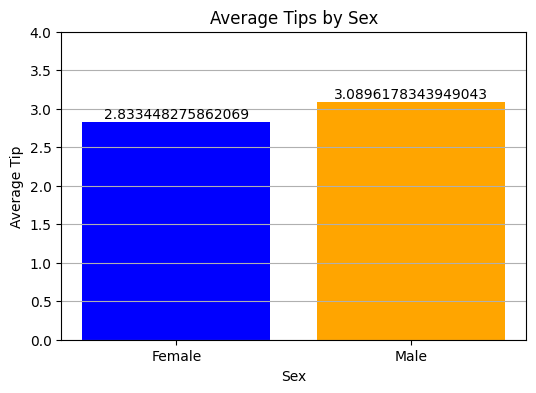

In [ ]:
avg_tips_by_sex = tips_project.groupby('sex')['tip'].mean()

# สร้างกราฟแท่ง
plt.figure(figsize=(6, 4))

# Plot the bar chart
tips_by_sex = plt.bar(avg_tips_by_sex.index, avg_tips_by_sex.values, color=['blue', 'orange'])

for T in tips_by_sex:
    height = T.get_height()
    plt.text(
        T.get_x() + T.get_width() / 2,  # x-position of the label
        height,  # y-position of the label
        f'{height}',  # Label text
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

# เพิ่มรายละเอียดในกราฟ
plt.ylim(0, 4.0)
plt.title('Average Tips by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Tip')
plt.grid(axis='y')

# แสดงกราฟ
plt.show()

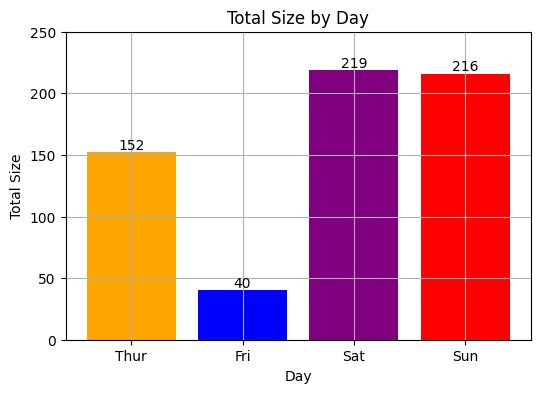

In [ ]:
day_order = ['Thur', 'Fri', 'Sat', 'Sun']
tips_project['day'] = pd.Categorical(tips_project['day'], categories=day_order, ordered=True)

# คำนวณจำนวนคนรวมต่อวัน
total_size_by_day = tips_project.groupby('day', observed=False)['size'].sum()

# สร้างกราฟแท่ง
plt.figure(figsize=(6, 4))

# วาดกราฟแท่ง
bars = plt.bar(total_size_by_day.index, total_size_by_day.values, color=['orange', 'blue', 'purple', 'red'])

# เพิ่มเลขบอกบนแท่งกราฟ
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position of the label
        height,  # y-position of the label
        f'{height}',  # Label text
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

# เพิ่มรายละเอียดในกราฟ
plt.ylim(0, 250)
plt.title('Total Size by Day')
plt.xlabel('Day')
plt.ylabel('Total Size')
plt.grid(True)

# แสดงกราฟ
plt.show()

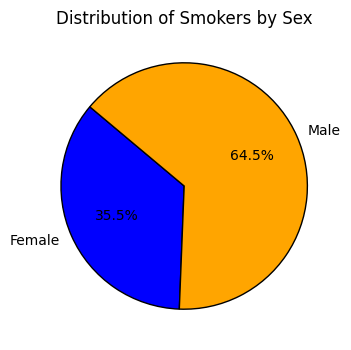

In [ ]:
smokers_data = tips_project[tips_project['smoker'] == 'Yes']

# นับจำนวนผู้สูบบุหรี่ตามเพศ
smokers_count_by_sex = smokers_data['sex'].value_counts()

# จัดลำดับของเพศ
desired_order = ['Female', 'Male']
smokers_count_by_sex = smokers_count_by_sex[desired_order]

# สร้างกราฟวงกลม
plt.figure(figsize=(6, 4))

# วาดกราฟวงกลม
plt.pie(
    smokers_count_by_sex,
    labels=smokers_count_by_sex.index,
    colors=['blue', 'orange'],
    autopct='%1.1f%%',  # แสดงเปอร์เซ็นต์บนกราฟ
    startangle=140,    # มุมเริ่มต้นของกราฟวงกลม
    wedgeprops={'edgecolor': 'black'}  # สีขอบของกราฟวงกลม
)

# เพิ่มรายละเอียดในกราฟ
plt.title('Distribution of Smokers by Sex')

# แสดงกราฟ
plt.show()

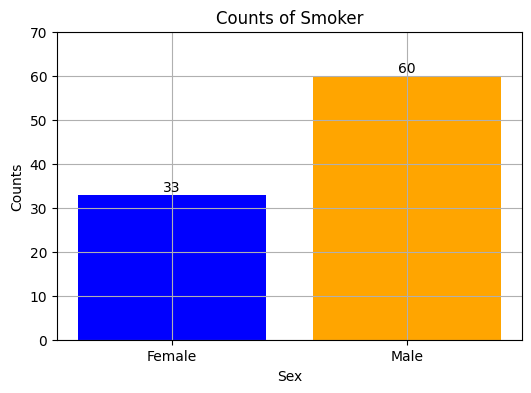

In [ ]:
smokers_data = tips_project[tips_project['smoker'] == 'Yes']

# นับจำนวนผู้สูบบุหรี่ตามเพศ
smokers_count_by_sex = smokers_data['sex'].value_counts()

desired_order = ['Female', 'Male']
smokers_count_by_sex = smokers_count_by_sex[desired_order]

# สร้างกราฟแท่ง
plt.figure(figsize=(6, 4))

# Plot the bar chart
smokers = plt.bar(smokers_count_by_sex.index, smokers_count_by_sex.values, color=['blue', 'orange'])

for S in smokers:
    height = S.get_height()
    plt.text(
        S.get_x() + S.get_width() / 2,  # x-position of the label
        height,  # y-position of the label
        f'{height}',  # Label text
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

# เพิ่มรายละเอียดในกราฟ
plt.ylim(0, 70)
plt.title('Counts of Smoker')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.grid(True)

# แสดงกราฟ
plt.show()

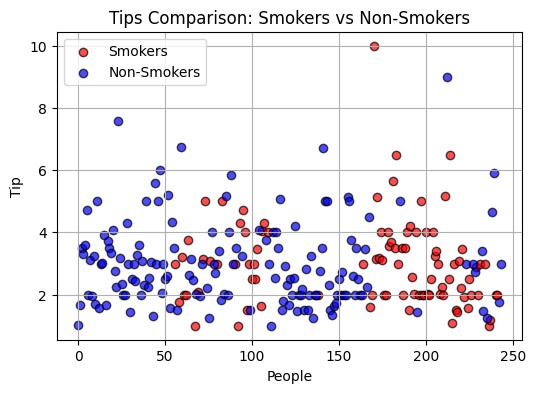

In [ ]:
smoker_data = tips_project[tips_project['smoker'] == 'Yes']
non_smoker_data = tips_project[tips_project['smoker'] == 'No']

# สร้างกราฟ Scatter
plt.figure(figsize=(6, 4))

# กราฟ Scatter สำหรับผู้สูบบุหรี่
plt.scatter(smoker_data.index, smoker_data['tip'], color='red', label='Smokers', alpha=0.7, edgecolor='black')

# กราฟ Scatter สำหรับผู้ไม่สูบบุหรี่
plt.scatter(non_smoker_data.index, non_smoker_data['tip'], color='blue', label='Non-Smokers', alpha=0.7, edgecolor='black')

# เพิ่มรายละเอียดในกราฟ
plt.title('Tips Comparison: Smokers vs Non-Smokers')
plt.xlabel('People')
plt.ylabel('Tip')
plt.legend()
plt.grid(True)

# แสดงกราฟ
plt.show()

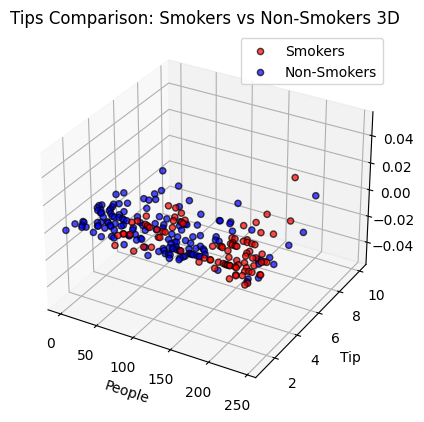

In [ ]:
ax = plt.axes(projection = "3d")
ax.scatter(smoker_data.index, smoker_data['tip'], color='red', label='Smokers', alpha=0.7, edgecolor='black')
ax.scatter(non_smoker_data.index, non_smoker_data['tip'], color='blue', label='Non-Smokers', alpha=0.7, edgecolor='black')

plt.legend()
plt.xlabel('People')
plt.ylabel('Tip')
plt.title('Tips Comparison: Smokers vs Non-Smokers 3D');

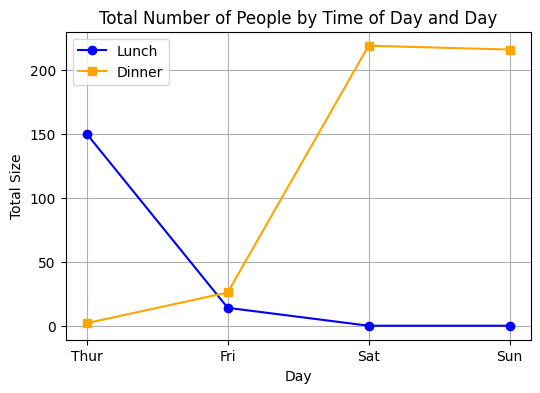

In [ ]:
size_by_day_time = tips_project.groupby(['day', 'time'], observed=False)['size'].sum().unstack()

# สร้างกราฟเส้น
plt.figure(figsize=(6, 4))

# วาดกราฟเส้นสำหรับช่วงกลางวัน
plt.plot(size_by_day_time.index, size_by_day_time.get('Lunch', []), marker='o', label='Lunch', color='blue')

# วาดกราฟเส้นสำหรับช่วงเย็น
plt.plot(size_by_day_time.index, size_by_day_time.get('Dinner', []), marker='s', label='Dinner', color='orange')

# เพิ่มรายละเอียดในกราฟ
plt.title('Total Number of People by Time of Day and Day')
plt.xlabel('Day')
plt.ylabel('Total Size')
plt.legend()
plt.grid(True)

# แสดงกราฟ
plt.show()

<Figure size 1000x600 with 0 Axes>

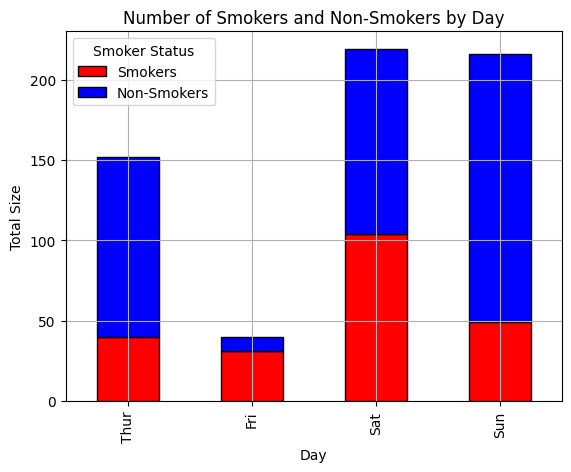

In [ ]:
# กรองข้อมูลและนับจำนวนคนที่สูบบุหรี่และไม่สูบบุหรี่ในแต่ละวัน
smoker_count_by_day = tips_project[tips_project['smoker'] == 'Yes'].groupby('day', observed=False)['size'].sum()
non_smoker_count_by_day = tips_project[tips_project['smoker'] == 'No'].groupby('day', observed=False)['size'].sum()

# รวมข้อมูลให้อยู่ใน DataFrame เดียว
data = pd.DataFrame({
    'Smokers': smoker_count_by_day,
    'Non-Smokers': non_smoker_count_by_day
}) # เติมค่า NaN ด้วย 0

# สร้างกราฟแท่งแบบซ้อนกัน
plt.figure(figsize=(10, 6))

# วาดกราฟแท่งแบบซ้อนกัน
data.plot(kind='bar', stacked=True, color=['red', 'blue'], edgecolor='black')

# เพิ่มรายละเอียดในกราฟ
plt.title('Number of Smokers and Non-Smokers by Day')
plt.xlabel('Day')
plt.ylabel('Total Size')
plt.legend(title='Smoker Status')
plt.grid(True)

# แสดงกราฟ
plt.show()

<Figure size 1000x600 with 0 Axes>

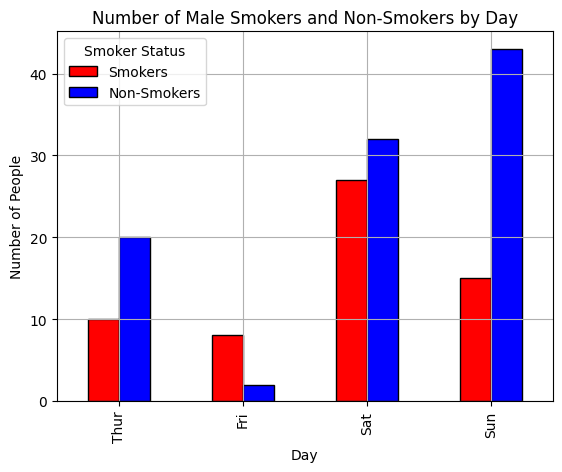

In [ ]:
male_smoker_data = tips_project[(tips_project['sex'] == 'Male') & (tips_project['smoker'] == 'Yes')]
male_non_smoker_data = tips_project[(tips_project['sex'] == 'Male') & (tips_project['smoker'] == 'No')]

# นับจำนวนผู้ชายที่สูบบุหรี่และไม่สูบบุหรี่ในแต่ละวัน
male_smoker_count_by_day = male_smoker_data.groupby('day', observed=False).size()
male_non_smoker_count_by_day = male_non_smoker_data.groupby('day', observed=False).size()

# รวมข้อมูลให้อยู่ใน DataFrame เดียว
data_male_smoker_non_smoker = pd.DataFrame({
    'Smokers': male_smoker_count_by_day,
    'Non-Smokers': male_non_smoker_count_by_day})  # เติมค่า NaN ด้วย 0

# สร้างกราฟแท่งแบบข้างกัน
plt.figure(figsize=(10, 6))

# Plot the bar chart
data_male_smoker_non_smoker.plot(kind='bar', color=['red', 'blue'], edgecolor='black')

# เพิ่มรายละเอียดในกราฟ
plt.title('Number of Male Smokers and Non-Smokers by Day')
plt.xlabel('Day')
plt.ylabel('Number of People')
plt.legend(title='Smoker Status')
plt.grid(True)

# แสดงกราฟ
plt.show()

<Figure size 1000x600 with 0 Axes>

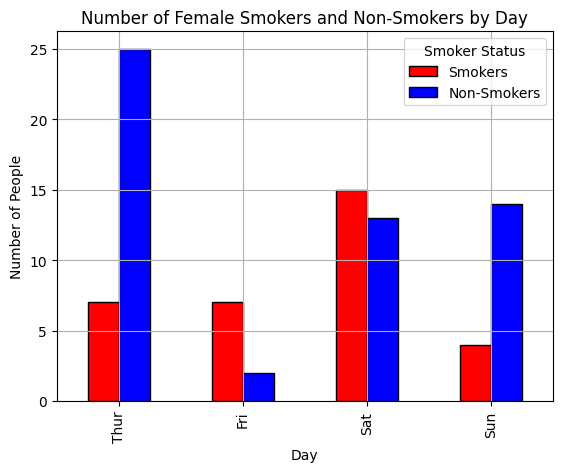

In [ ]:
female_smoker_data = tips_project[(tips_project['sex'] == 'Female') & (tips_project['smoker'] == 'Yes')]
female_non_smoker_data = tips_project[(tips_project['sex'] == 'Female') & (tips_project['smoker'] == 'No')]

# นับจำนวนผู้ชายที่สูบบุหรี่และไม่สูบบุหรี่ในแต่ละวัน
female_smoker_count_by_day = female_smoker_data.groupby('day', observed=False).size()
female_non_smoker_count_by_day = female_non_smoker_data.groupby('day', observed=False).size()

# รวมข้อมูลให้อยู่ใน DataFrame เดียว
data_female_smoker_non_smoker = pd.DataFrame({
    'Smokers': female_smoker_count_by_day,
    'Non-Smokers': female_non_smoker_count_by_day})  # เติมค่า NaN ด้วย 0

# สร้างกราฟแท่งแบบข้างกัน
plt.figure(figsize=(10, 6))

# Plot the bar chart
data_female_smoker_non_smoker.plot(kind='bar', color=['red', 'blue'], edgecolor='black')

# เพิ่มรายละเอียดในกราฟ
plt.title('Number of Female Smokers and Non-Smokers by Day')
plt.xlabel('Day')
plt.ylabel('Number of People')
plt.legend(title='Smoker Status')
plt.grid(True)

# แสดงกราฟ
plt.show()